## LABORATORY 04: MACHINE LEARNING II - CLASSIFICATION PROBLEM

## Information  

|Variable | Type | Description | 
|---|---|---|
|Gender	Feature| 	Categorical|	
|Age	Feature|	Continuous|
|Height	 Feature|	Continuous|	
|Weight	 Feature|	Continuous|		
|family_history_with_overweight	Feature|	Binary|	   Has a family member suffered or suffers from overweight?|
|FAVC Feature	|Binary|		Do you eat high caloric food frequently?|
|FCVC	Feature |	Integer |		Do you usually eat vegetables in your meals?|
|NCP	Feature|	Continuous|		How many main meals do you have daily?|
|CAEC	Feature	|Categorical|		Do you eat any food between meals?|
|SMOKE	Feature |	Binary |		Do you smoke?|	
|CH2O	Feature |	Continuous|		How much water do you drink daily?|
|SCC	Feature	| Binary |		Do you monitor the calories you eat daily?|
|FAF	Feature	| Continuous	|	How often do you have physical activity? |
|TUE	Feature |	Integer		| How much time do you use technological devices such as cell phone, videogames, television, computer and others? |	
|CALC	Feature |	Categorical	|	How often do you drink alcohol?	|
|MTRANS	Feature	| Categorical |		Which transportation do you usually use? |
|NObeyesdad	Target |	Categorical	|	Obesity level |	

#### 1. Load the dataset

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sbn
import scripts
from sklearn.model_selection import train_test_split


In [2]:
# load train and test set
dataset = pd.read_csv("estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition/data.csv", sep = ",", skipinitialspace=True)
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
dataset.shape

(2111, 17)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(dataset.loc[:, dataset.columns != 'NObeyesdad'],dataset['NObeyesdad'], test_size=0.2)
train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)
x, y = dataset.loc[:, dataset.columns != 'NObeyesdad'], dataset['NObeyesdad']

In [5]:
x_test.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
123,Male,24.0,1.660000,67.000000,yes,yes,3.000000,1.0,Sometimes,no,2.000000,no,1.000000,0.000000,no,Public_Transportation
1273,Male,29.0,1.682916,89.991671,yes,yes,1.851262,3.0,Sometimes,no,2.112670,no,0.388269,0.000000,Sometimes,Automobile
294,Male,18.0,1.860000,110.000000,yes,yes,2.000000,1.0,Sometimes,yes,2.000000,no,1.000000,2.000000,Sometimes,Public_Transportation
337,Male,18.0,1.780000,64.400000,yes,yes,3.000000,3.0,Frequently,no,2.000000,no,3.000000,2.000000,no,Walking
2059,Female,26.0,1.629727,111.275646,yes,yes,3.000000,3.0,Sometimes,no,2.495851,no,0.000000,0.218645,Sometimes,Public_Transportation


In [6]:
# dimensions of dataset
print("#Train-samples = ", train.shape[0])
print("#Train-features = ", train.shape[1])
print("#Test-samples = ", test.shape[0])
print("#Test-features = ", test.shape[1])

#Train-samples =  1688
#Train-features =  17
#Test-samples =  423
#Test-features =  17


In [7]:
# definition of preprocessor
from scripts.preprocess import DataPreprocessing

dp = DataPreprocessing()
metadata, num_cols, cat_cols = dp.get_metadata(train)

print(f"Metadata ==> total: {len(metadata)} \n", metadata)
print("Numerical features: \n", num_cols)
print("Categorical features: \n", cat_cols)

Metadata ==> total: 17 
 Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
Numerical features: 
 ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical features: 
 ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


#### 2. Data Cleaning

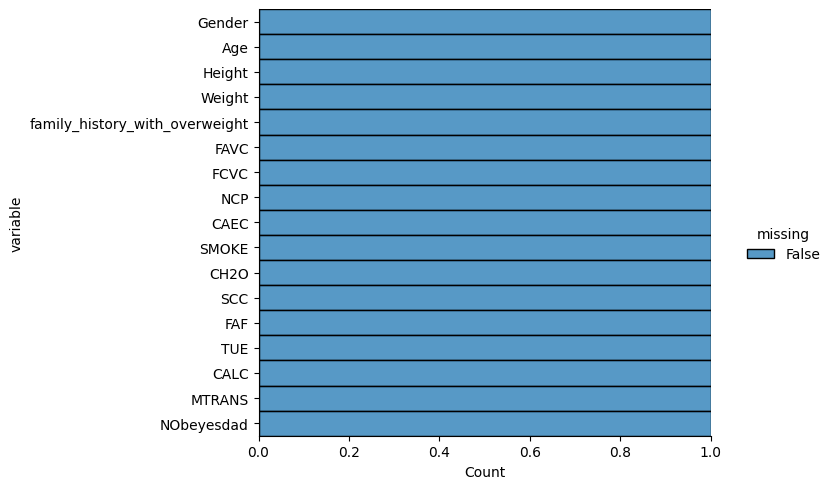

In [8]:
dp.filter_missing(dataset)

#### 3. Exploratory Data Analysis

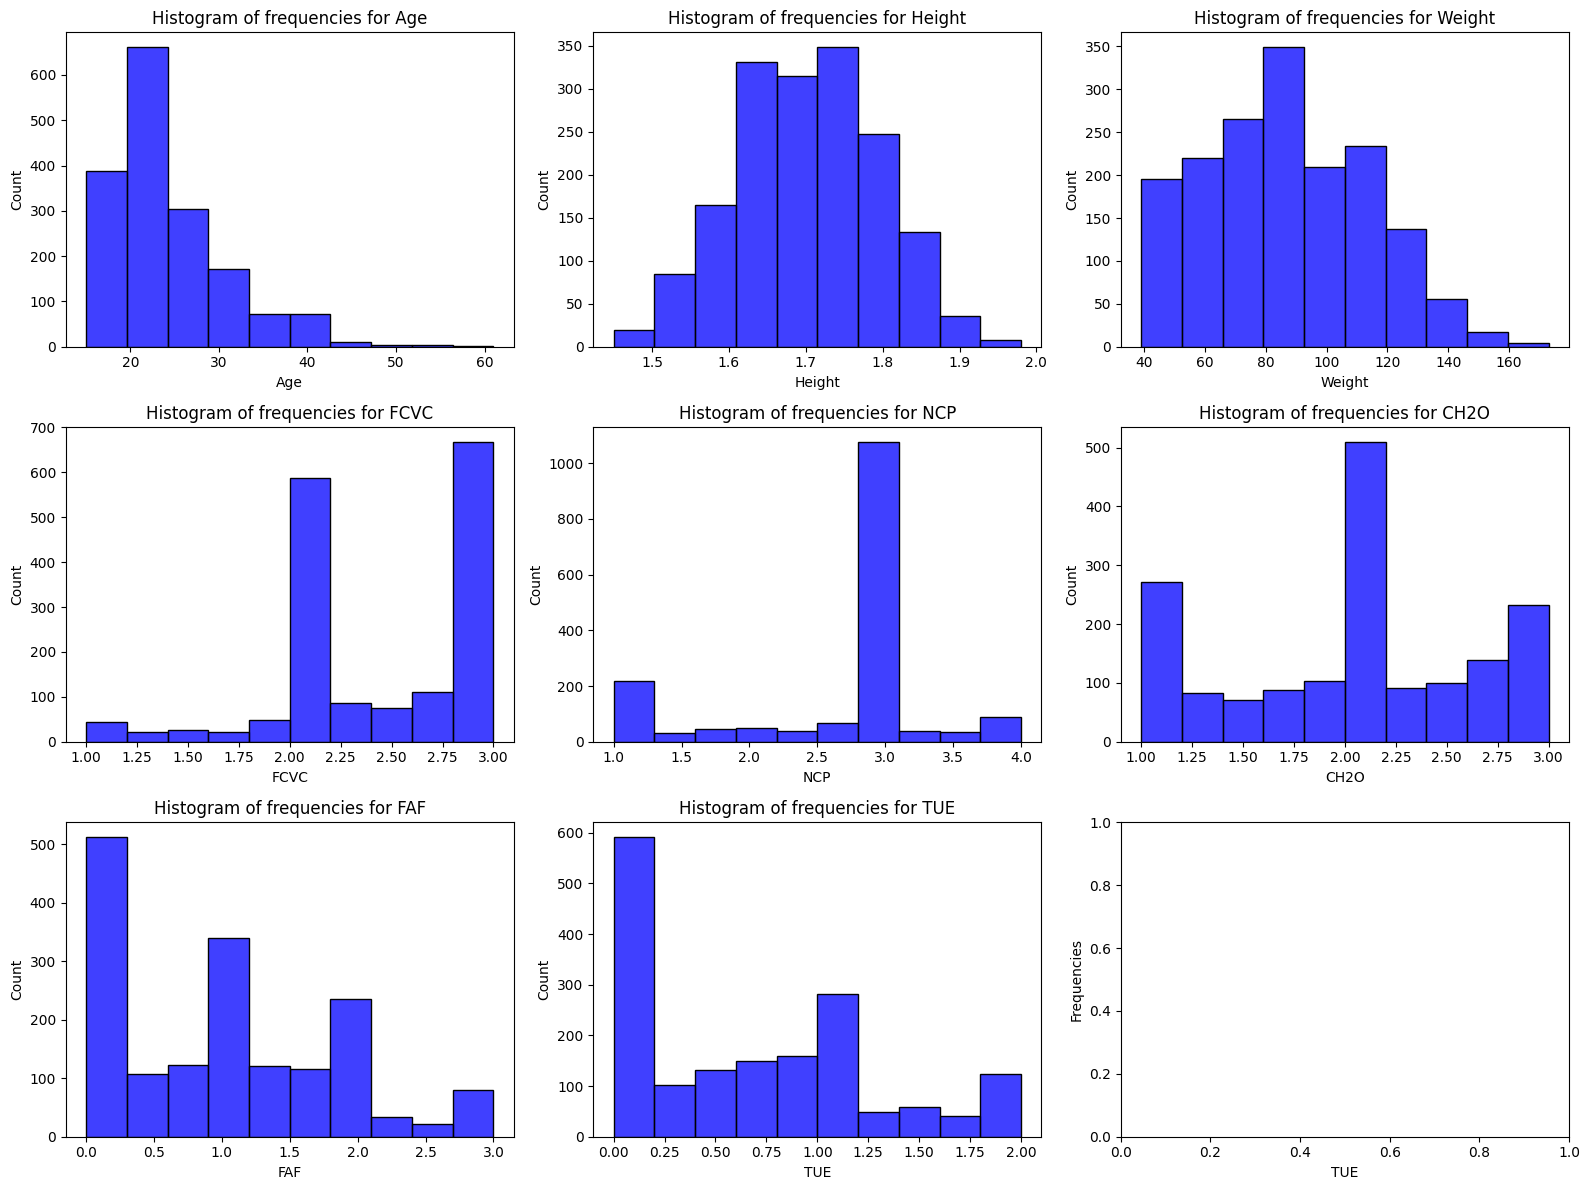

In [9]:
# plot the histogram of frequencies for numerical features
dp.hist_frequencies(train, num_cols, bins = 10)

In [10]:
# check the behavior of categorical features
dp.get_categorical_instances(train, cat_cols)


***** Gender ******
Gender
Male      850
Female    838
Name: count, dtype: int64

***** family_history_with_overweight ******
family_history_with_overweight
yes    1390
no      298
Name: count, dtype: int64

***** FAVC ******
FAVC
yes    1506
no      182
Name: count, dtype: int64

***** CAEC ******
CAEC
Sometimes     1419
Frequently     184
Always          43
no              42
Name: count, dtype: int64

***** SMOKE ******
SMOKE
no     1652
yes      36
Name: count, dtype: int64

***** SCC ******
SCC
no     1617
yes      71
Name: count, dtype: int64

***** CALC ******
CALC
Sometimes     1128
no             501
Frequently      58
Always           1
Name: count, dtype: int64

***** MTRANS ******
MTRANS
Public_Transportation    1257
Automobile                369
Walking                    46
Motorbike                   9
Bike                        7
Name: count, dtype: int64

***** NObeyesdad ******
NObeyesdad
Obesity_Type_I         269
Obesity_Type_III       267
Obesity_Type_II        2

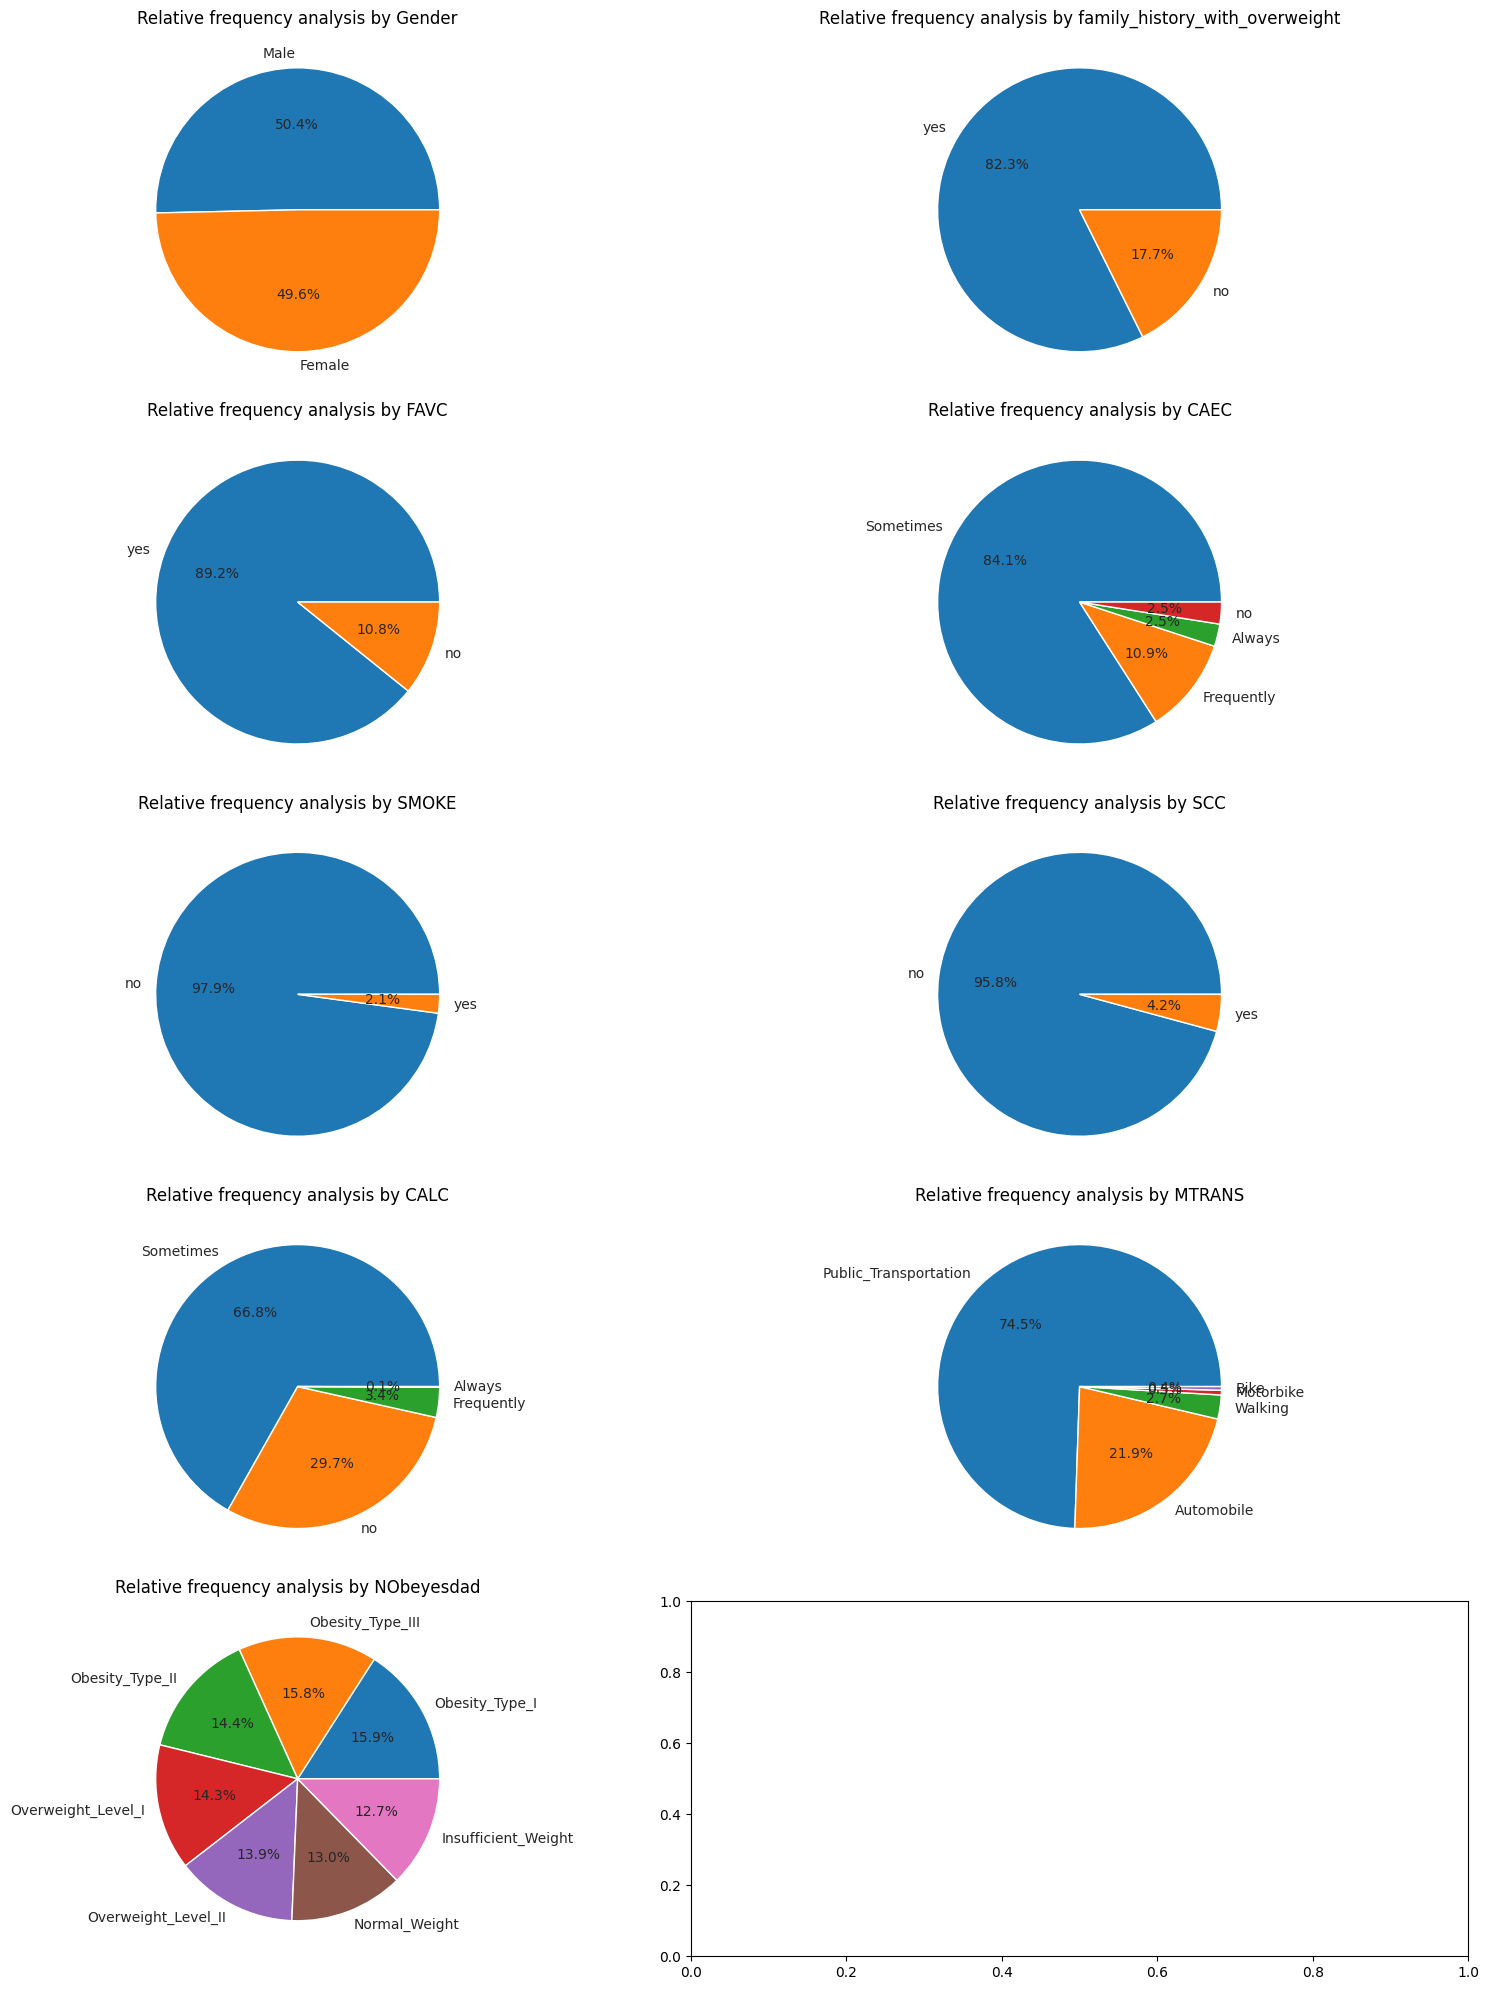

In [11]:
# iteratively pie chart
dp.iter_piechart(train, cat_cols)

#### 4. Data preprocessing

In [12]:
x_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
1202,Male,24.362124,1.716677,85.261339,yes,yes,2.000000,2.676148,Sometimes,no,2.083939,no,0.632164,0.993786,Sometimes,Public_Transportation
1668,Male,30.003358,1.758355,112.007101,yes,yes,1.750809,3.000000,Sometimes,no,2.002871,no,0.000000,0.114457,Sometimes,Automobile
1906,Female,26.000000,1.631856,110.804337,yes,yes,3.000000,3.000000,Sometimes,no,2.704850,no,0.000000,0.243338,Sometimes,Public_Transportation
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.000000,3.000000,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation
976,Female,19.774317,1.541039,64.726948,no,yes,2.706134,2.669766,Sometimes,no,1.979848,yes,0.445238,0.908836,Sometimes,Public_Transportation


Split train and test set

In [13]:
print("X-train dim: ", x_train.shape)
print("Y-train: ", len(y_train))
print("X-test dim: ", x_test.shape)
print("Y-test: ", len(y_test))

X-train dim:  (1688, 16)
Y-train:  1688
X-test dim:  (423, 16)
Y-test:  423


Transforming the numerical and categorical features  

* Numerical features: 
 ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
 
* Categorical features: 
 ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad'] 

In [14]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

transformer = make_column_transformer(
    (StandardScaler(),  ['Age', 'Height', 'Weight']),  
    (RobustScaler(), ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']),
    (OneHotEncoder(handle_unknown="ignore"),  ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'] )    
)

In [15]:
# transformer will learn only from training data
transformer.fit(x_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Age', 'Height', 'Weight']),
                                ('robustscaler', RobustScaler(),
                                 ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'family_history_with_overweight',
                                  'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC',
                                  'MTRANS'])])

In [16]:
# transformer will transform the train and test data
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)

In [17]:
x_train

array([[ 0.00652406,  0.14547307, -0.06443031, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.89760364,  0.59412142,  0.95415582, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.26524012, -0.76759382,  0.90834973, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.31238106,  1.79959879,  1.31409288, ...,  0.        ,
         1.        ,  0.        ],
       [-1.09288069,  0.08173568, -1.40732384, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.21046541, -0.41145672,  0.91283729, ...,  0.        ,
         1.        ,  0.        ]])

In [18]:
y_train

1202    Overweight_Level_II
1668        Obesity_Type_II
1906       Obesity_Type_III
2110       Obesity_Type_III
976      Overweight_Level_I
               ...         
550     Insufficient_Weight
1765        Obesity_Type_II
1706        Obesity_Type_II
585     Insufficient_Weight
1861       Obesity_Type_III
Name: NObeyesdad, Length: 1688, dtype: object

In [19]:
classes = np.unique(y)
print("Avalilable classes: ", classes)

Avalilable classes:  ['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


#### 5. Building Models

Benchmark for Models
* KNN
* SVM
* Random Forest
* XGBoost Classifier
* LightGBM Classifier

In [20]:
%reload_ext autoreload
%autoreload 2

##### KNN Classifier

In [21]:
from scripts.classifiers import KNNModel
import time

# train model
sttrain_knn = time.time()
knn = KNNModel()
knn_model = knn.train(x_train, y_train)

# calculate time
ettrain_knn = time.time()
ttrain_knn = ettrain_knn - sttrain_knn
print(f"Time of training KNN: {ttrain_knn:.3f} seconds")

/home/user/Projects/GitHubProjects/specialized-homework/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/user/Projects/GitHubProjects/specialized-homework/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/user/Projects/GitHubProjects/specialized-homework/.venv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/user/Projects/GitHubProjects/specialized-homework/.venv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/home/user/Projects/GitHubProjects/specialized-homework/.venv/lib/pyt

Best KNN Parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Time of training KNN: 8.835 seconds


/home/user/Projects/GitHubProjects/specialized-homework/.venv/lib/python3.10/site-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.83531684 0.8436114  0.81635559 0.83828244        nan 0.87739715
        nan 0.86791214 0.83531684 0.8436114  0.81635559 0.83828244
 0.86258143 0.87739715 0.85013608 0.86791214 0.83531684 0.8436114
 0.81635559 0.83828244 0.86258143 0.87739715 0.85013608 0.86791214]
  warnings.warn(


In [22]:
knn_model

KNeighborsClassifier(metric='manhattan', weights='distance')

In [23]:
# make predictions
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", knn_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", knn_model.predict(x_test[0:10]))

real values in train:  ['Overweight_Level_II' 'Obesity_Type_II' 'Obesity_Type_III'
 'Obesity_Type_III' 'Overweight_Level_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Normal_Weight' 'Obesity_Type_III'
 'Overweight_Level_II']
predicted values in train:  ['Overweight_Level_II' 'Obesity_Type_II' 'Obesity_Type_III'
 'Obesity_Type_III' 'Overweight_Level_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Normal_Weight' 'Obesity_Type_III'
 'Overweight_Level_II']
real values in test:  ['Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_I' 'Normal_Weight'
 'Obesity_Type_III' 'Overweight_Level_II' 'Obesity_Type_I'
 'Obesity_Type_II' 'Normal_Weight' 'Insufficient_Weight']
predicted values in test:  ['Overweight_Level_I' 'Obesity_Type_I' 'Obesity_Type_I'
 'Insufficient_Weight' 'Obesity_Type_III' 'Overweight_Level_II'
 'Obesity_Type_I' 'Obesity_Type_II' 'Overweight_Level_I'
 'Insufficient_Weight']


In [24]:
# deploy knn model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="knn_v1.pkl", model=knn_model)

In [25]:
# evaluate knn model
from scripts.evaluator import EvalClassifier
rec_knn = DeployClassifier(path = "models").load_model(filename="knn_v1.pkl")
eval_knn = EvalClassifier(model = rec_knn)

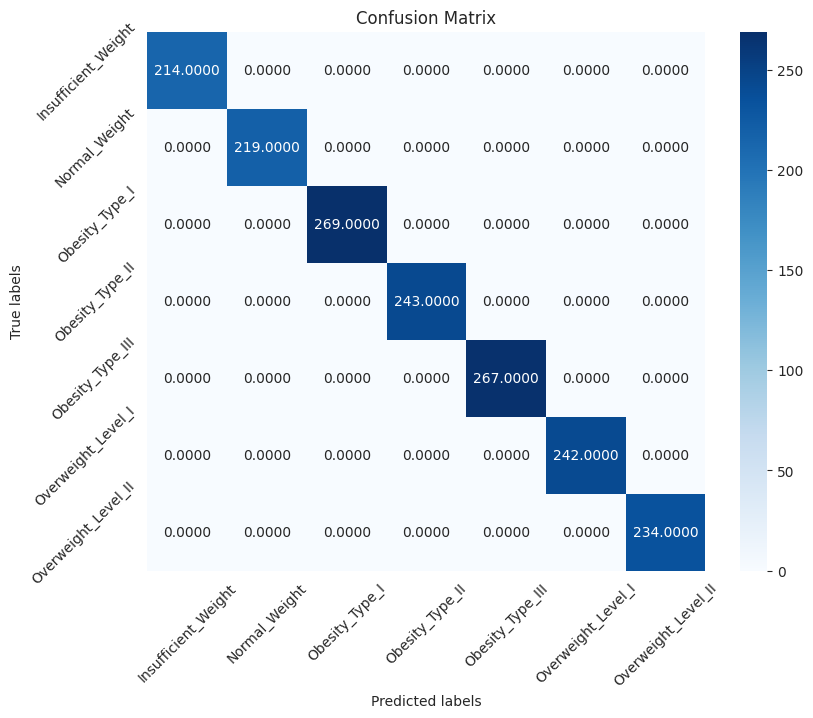

In [26]:
# get confusion matrix in training
y_pred = rec_knn.predict(x_train)
cmknn_train = eval_knn.get_confusion_matrix(y_train.values, y_pred, classes)
eval_knn.plot_confusion_matrix(cmknn_train, classes)

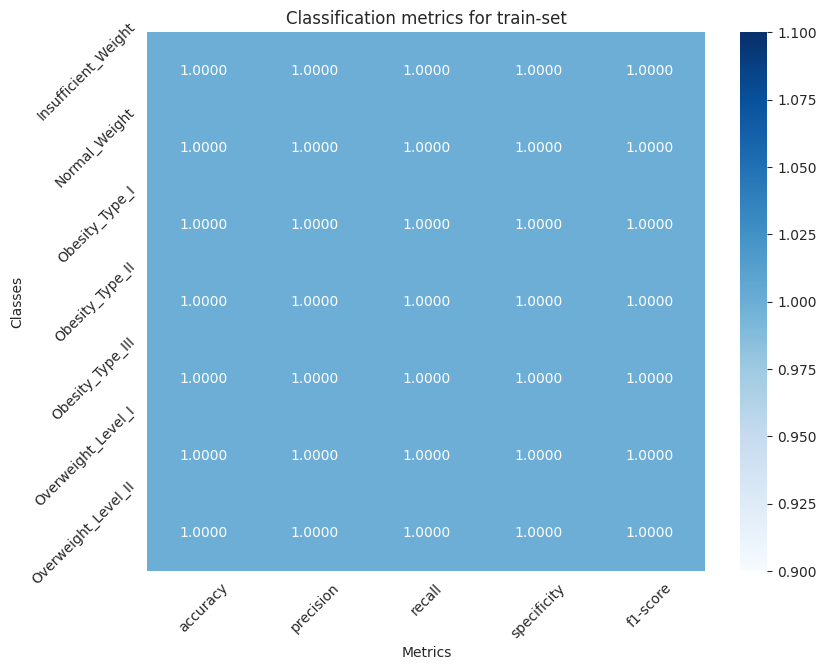

In [27]:
metrics_train_knn = eval_knn.calculate_metrics_by_class(cmknn_train, classes)
eval_knn.plot_metrics_by_class(metrics_train_knn, "Classification metrics for train-set")

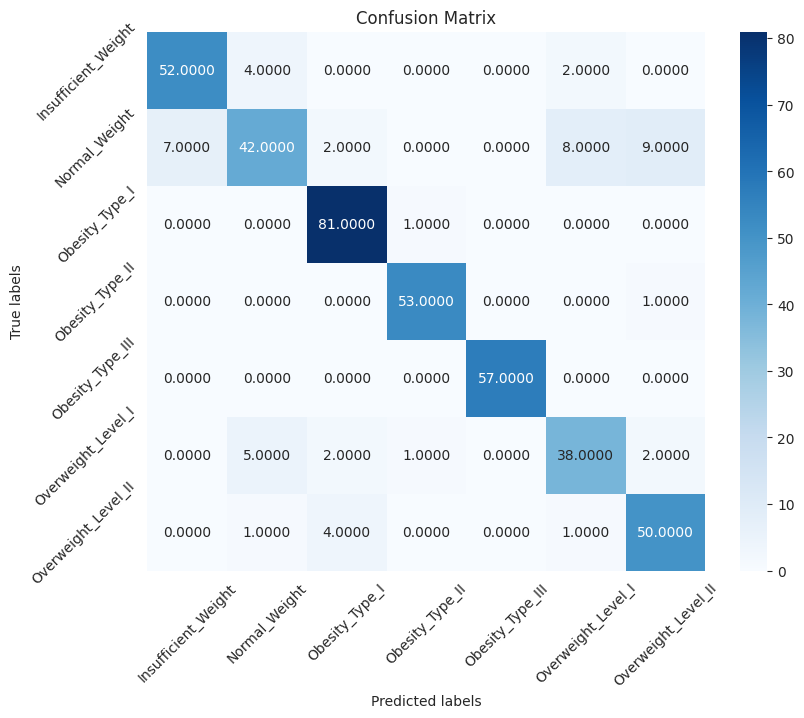

In [28]:
# get confusion matrix in testing
y_pred = rec_knn.predict(x_test)
cmknn_test = eval_knn.get_confusion_matrix(y_test, y_pred, classes)
eval_knn.plot_confusion_matrix(cmknn_test, classes)

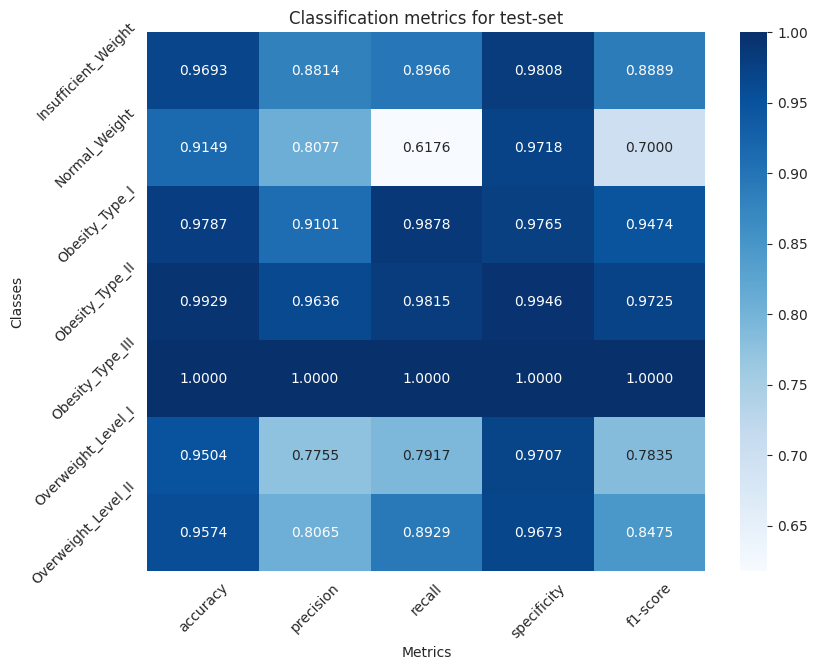

In [29]:
metrics_test_knn = eval_knn.calculate_metrics_by_class(cmknn_test, classes)
eval_knn.plot_metrics_by_class(metrics_test_knn, "Classification metrics for test-set")

In [67]:
# calculate the metrics for whole test set
xall_knn = eval_knn.calculate_metrics_xall(cmknn_test, metrics_test_knn)
eval_knn.calculate_metrics_xall(cmknn_test, metrics_test_knn)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.881797,0.877823,0.881144,0.980249,0.8771


##### SVM Classifier

In [31]:
from scripts.classifiers import SVMModel
import time

# train model
sttrain_svm = time.time()
svm = SVMModel()
svm_model = svm.train(x_train, y_train)

# calculate time
ettrain_svm = time.time()
ttrain_svm = ettrain_svm - sttrain_svm
print(f"Time of training SVM: {ttrain_svm:.3f} seconds")

Best SVM Parameters: {'C': 10, 'class_weight': 'balanced', 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Time of training SVM: 8.755 seconds


In [32]:
svm_model

SVC(C=10, class_weight='balanced', degree=2, kernel='linear')

In [33]:
# make predictions
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", svm_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", svm_model.predict(x_test[0:10]))

real values in train:  ['Overweight_Level_II' 'Obesity_Type_II' 'Obesity_Type_III'
 'Obesity_Type_III' 'Overweight_Level_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Normal_Weight' 'Obesity_Type_III'
 'Overweight_Level_II']
predicted values in train:  ['Overweight_Level_II' 'Obesity_Type_II' 'Obesity_Type_III'
 'Obesity_Type_III' 'Overweight_Level_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Normal_Weight' 'Obesity_Type_III'
 'Overweight_Level_II']
real values in test:  ['Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_I' 'Normal_Weight'
 'Obesity_Type_III' 'Overweight_Level_II' 'Obesity_Type_I'
 'Obesity_Type_II' 'Normal_Weight' 'Insufficient_Weight']
predicted values in test:  ['Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_I' 'Normal_Weight'
 'Obesity_Type_III' 'Overweight_Level_II' 'Obesity_Type_I'
 'Obesity_Type_II' 'Normal_Weight' 'Insufficient_Weight']


In [34]:
# deploy svm model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="svm_v1.pkl", model=svm_model)

In [35]:
# evaluate svm model
from scripts.evaluator import EvalClassifier
rec_svm = DeployClassifier(path = "models").load_model(filename="svm_v1.pkl")
eval_svm = EvalClassifier(model = rec_svm)

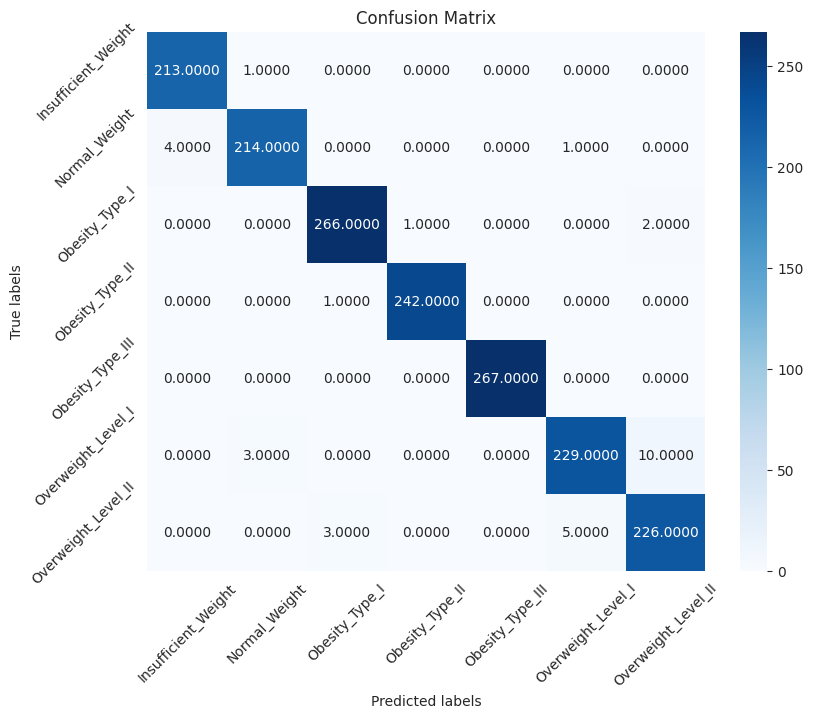

In [36]:
# get confusion matrix in training
y_pred = rec_svm.predict(x_train)
cmsvm_train = eval_svm.get_confusion_matrix(y_train, y_pred, classes)
eval_svm.plot_confusion_matrix(cmsvm_train, classes)

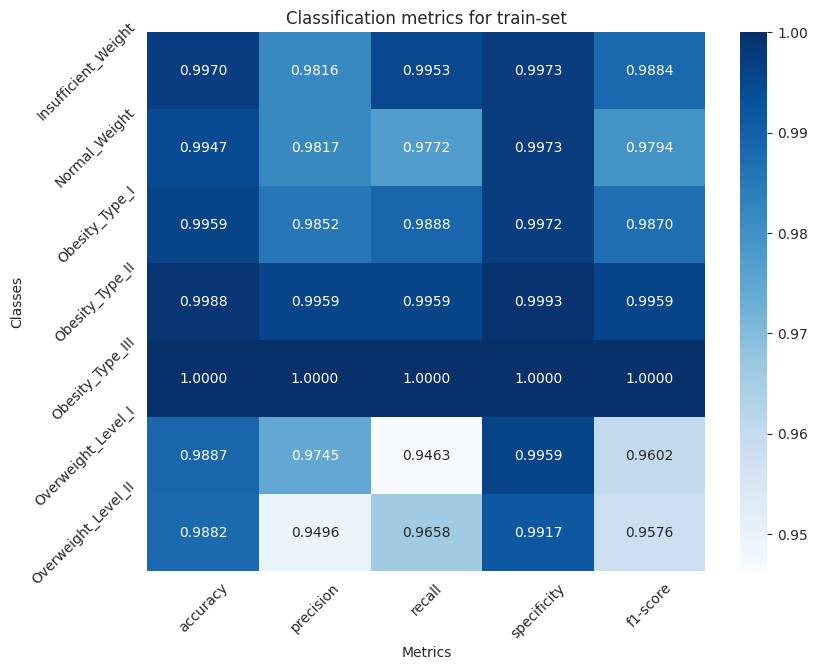

In [37]:
metrics_train_svm = eval_svm.calculate_metrics_by_class(cmsvm_train, classes)
eval_svm.plot_metrics_by_class(metrics_train_svm, "Classification metrics for train-set")

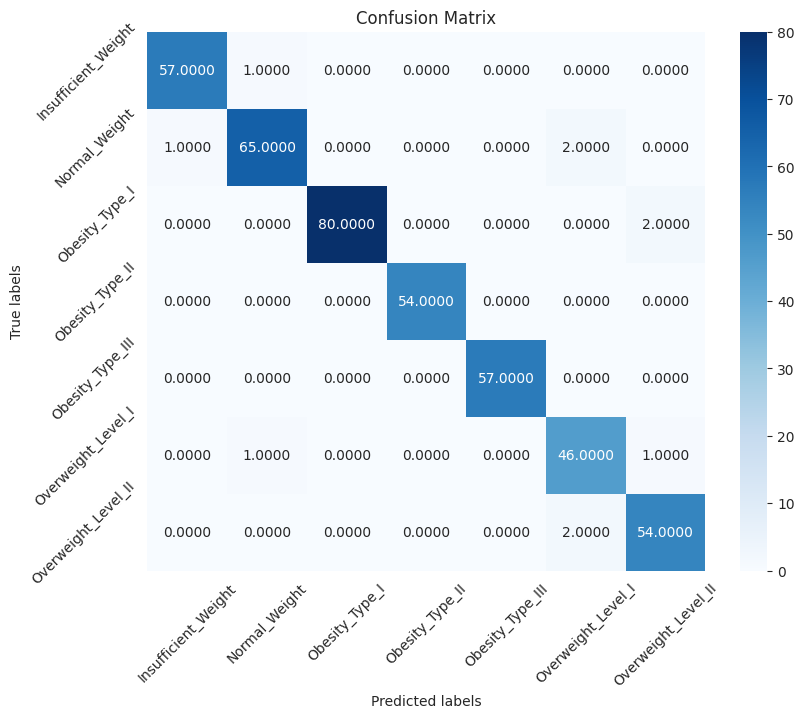

In [38]:
# get confusion matrix in testing
y_pred = rec_svm.predict(x_test)
cmsvm_test = eval_svm.get_confusion_matrix(y_test, y_pred, classes)
eval_svm.plot_confusion_matrix(cmsvm_test, classes)

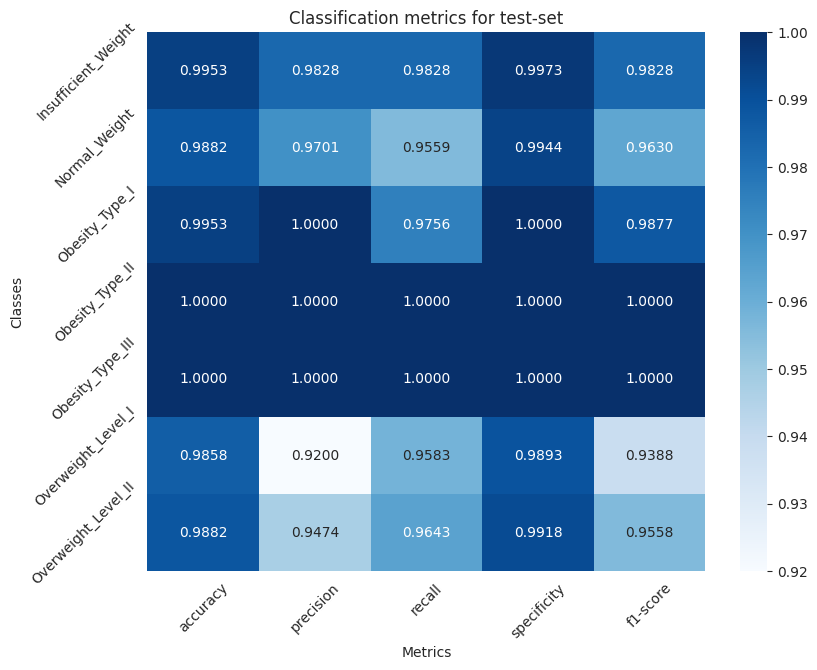

In [39]:
metrics_test_svm = eval_svm.calculate_metrics_by_class(cmsvm_test, classes)
eval_svm.plot_metrics_by_class(metrics_test_svm, "Classification metrics for test-set")

In [66]:
# calculate the metrics for whole test set
xall_svm = eval_svm.calculate_metrics_xall(cmsvm_test, metrics_test_svm)
eval_svm.calculate_metrics_xall(cmsvm_test, metrics_test_svm)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.976359,0.974325,0.976696,0.996112,0.975415


##### Random Forest Classifier

In [41]:
from scripts.classifiers import RandomForestModel
import time

# train model
sttrain_rf = time.time()
rf = RandomForestModel()
rf_model = rf.train(x_train, y_train)

# calculate time
ettrain_rf = time.time()
ttrain_rf = ettrain_rf - sttrain_rf
print(f"Time of training Random Forest: {ttrain_rf:.3f} seconds")

Best Random Forest Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 40}
Time of training Random Forest: 28.531 seconds


In [42]:
rf_model

RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=40)

In [43]:
# make predictions
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", rf_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", rf_model.predict(x_test[0:10]))

real values in train:  ['Overweight_Level_II' 'Obesity_Type_II' 'Obesity_Type_III'
 'Obesity_Type_III' 'Overweight_Level_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Normal_Weight' 'Obesity_Type_III'
 'Overweight_Level_II']
predicted values in train:  ['Overweight_Level_II' 'Obesity_Type_II' 'Obesity_Type_III'
 'Obesity_Type_III' 'Overweight_Level_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Normal_Weight' 'Obesity_Type_III'
 'Overweight_Level_II']
real values in test:  ['Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_I' 'Normal_Weight'
 'Obesity_Type_III' 'Overweight_Level_II' 'Obesity_Type_I'
 'Obesity_Type_II' 'Normal_Weight' 'Insufficient_Weight']
predicted values in test:  ['Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_I' 'Normal_Weight'
 'Obesity_Type_III' 'Overweight_Level_II' 'Obesity_Type_I'
 'Obesity_Type_II' 'Normal_Weight' 'Insufficient_Weight']


In [44]:
# deploy rf model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="rf_v1.pkl", model=rf_model)

In [45]:
# evaluate rf model
from scripts.evaluator import EvalClassifier
rec_rf = DeployClassifier(path = "models").load_model(filename="rf_v1.pkl")
eval_rf = EvalClassifier(model = rec_rf)

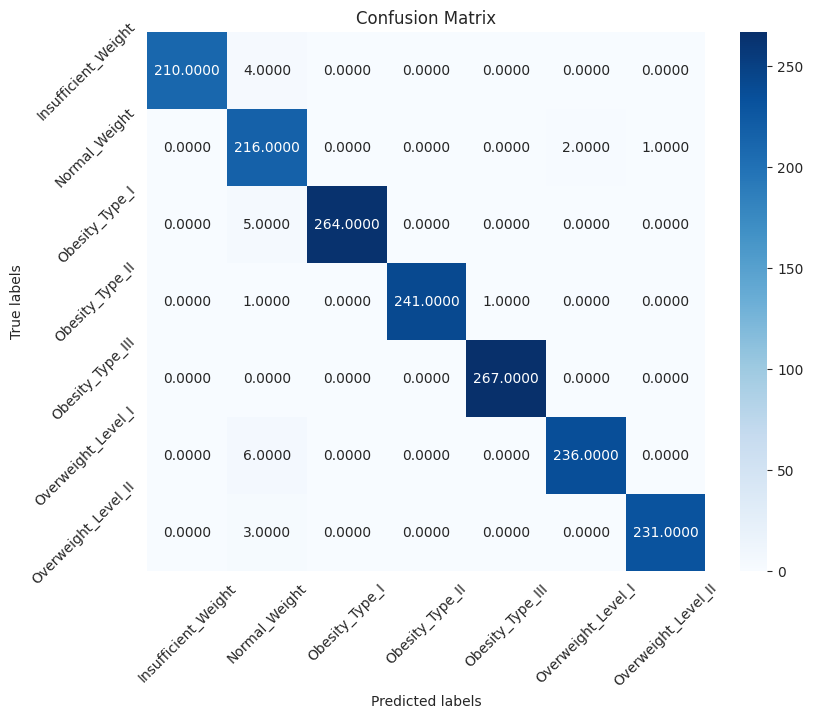

In [46]:
# get confusion matrix in training
y_pred = rec_rf.predict(x_train)
cmrf_train = eval_rf.get_confusion_matrix(y_train.values, y_pred, classes)
eval_rf.plot_confusion_matrix(cmrf_train, classes)

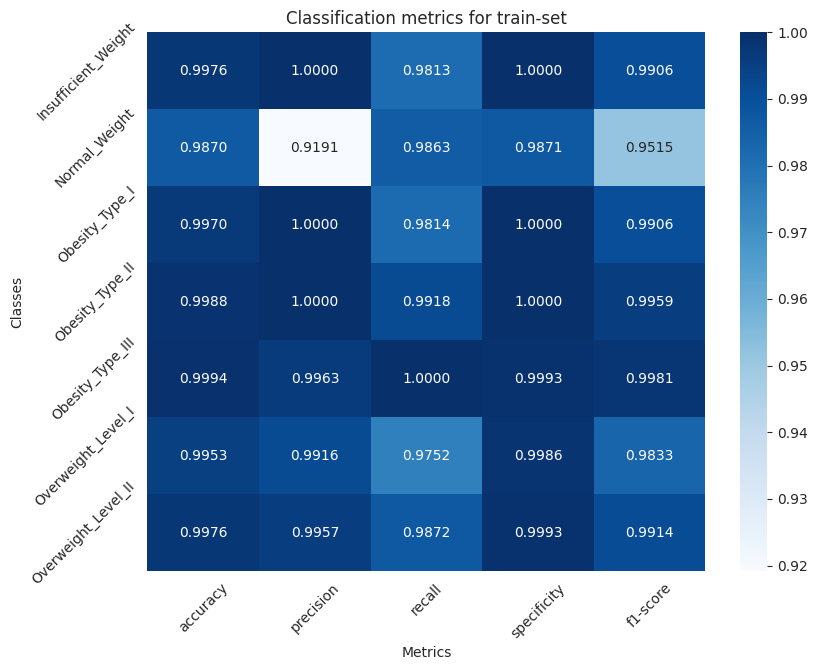

In [47]:
metrics_train_rf = eval_knn.calculate_metrics_by_class(cmrf_train, classes)
eval_rf.plot_metrics_by_class(metrics_train_rf, "Classification metrics for train-set")

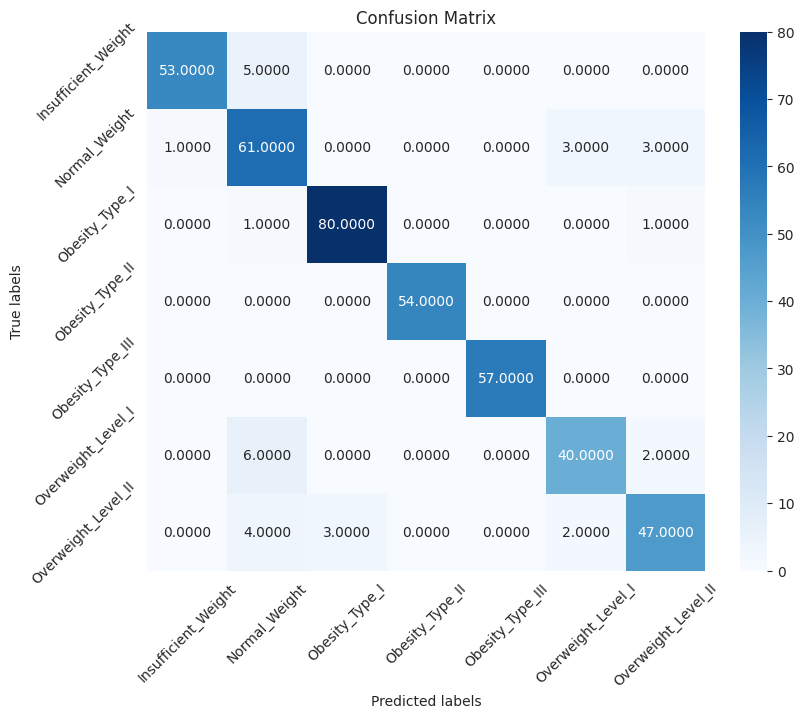

In [48]:
# get confusion matrix in testing
y_pred = rec_rf.predict(x_test)
cmrf_test = eval_rf.get_confusion_matrix(y_test, y_pred, classes)
eval_rf.plot_confusion_matrix(cmrf_test, classes)

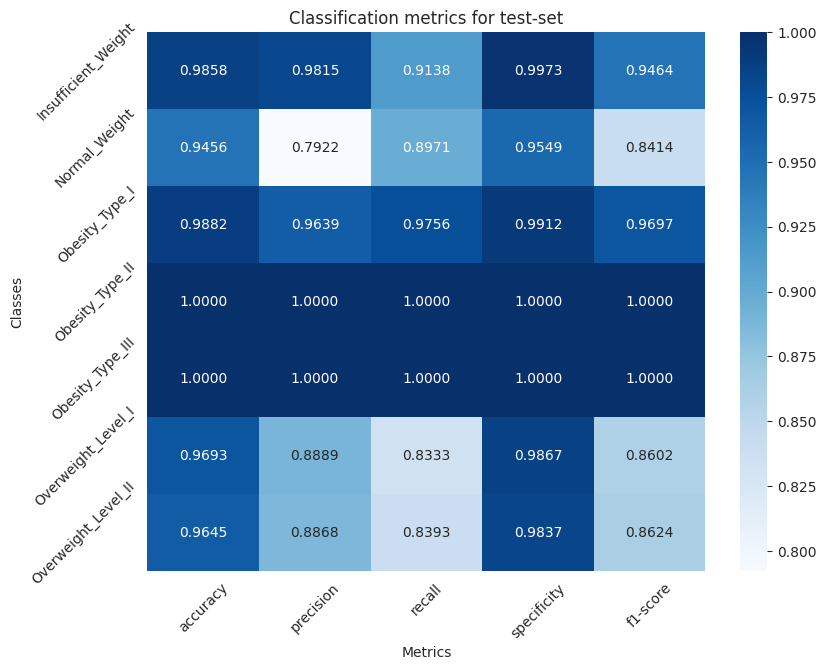

In [49]:
metrics_test_rf = eval_rf.calculate_metrics_by_class(cmrf_test, classes)
eval_rf.plot_metrics_by_class(metrics_test_rf, "Classification metrics for test-set")

In [65]:
# calculate the metrics for whole test set
xall_rf = eval_rf.calculate_metrics_xall(cmrf_test, metrics_test_rf)
eval_rf.calculate_metrics_xall(cmrf_test, metrics_test_rf)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.926714,0.930461,0.922726,0.987673,0.925729


##### XGBoost Classifier

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_l = le.fit_transform(y_train)

In [52]:
from scripts.classifiers import XGBoostModel
import time

# train model
sttrain_xg = time.time()
xg = XGBoostModel()
xg_model = xg.train(x_train, y_train_l)

# calculate time
ettrain_xg = time.time()
ttrain_xg = ettrain_xg - sttrain_xg
print(f"Time of training XGBoost: {ttrain_xg:.3f} seconds")

Best XGBoost Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.7}
Time of training XGBoost: 112.079 seconds


In [53]:
xg_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [54]:
# make predictions
print("real values in train: ", le.fit_transform(y_train[0:10].values))
print("predicted values in train: ", xg_model.predict(x_train[0:10]))
print("real values in test: ", le.fit_transform(y_test[0:10].values))
print("predicted values in test: ", xg_model.predict(x_test[0:10]))

real values in train:  [4 1 2 2 3 1 2 0 2 4]
predicted values in train:  [6 3 4 4 5 3 4 1 4 6]
real values in test:  [1 2 2 1 4 5 2 3 1 0]
predicted values in test:  [1 2 2 1 4 6 2 3 1 0]


In [55]:
# deploy rf model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="xg_v1.pkl", model=xg_model)

In [56]:
# evaluate rf model
from scripts.evaluator import EvalClassifier
rec_xg = DeployClassifier(path = "models").load_model(filename="xg_v1.pkl")
eval_xg = EvalClassifier(model = rec_xg)

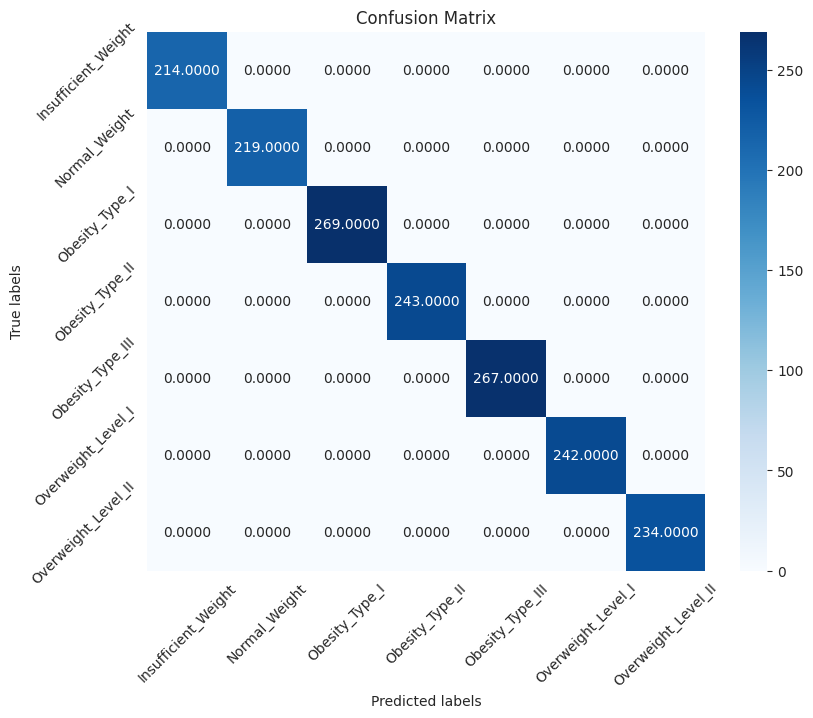

In [57]:
# get confusion matrix in training
y_pred = rec_xg.predict(x_train)
cmxg_train = eval_xg.get_confusion_matrix(le.fit_transform(y_train), y_pred, le.fit_transform(classes))
eval_xg.plot_confusion_matrix(cmxg_train, classes)

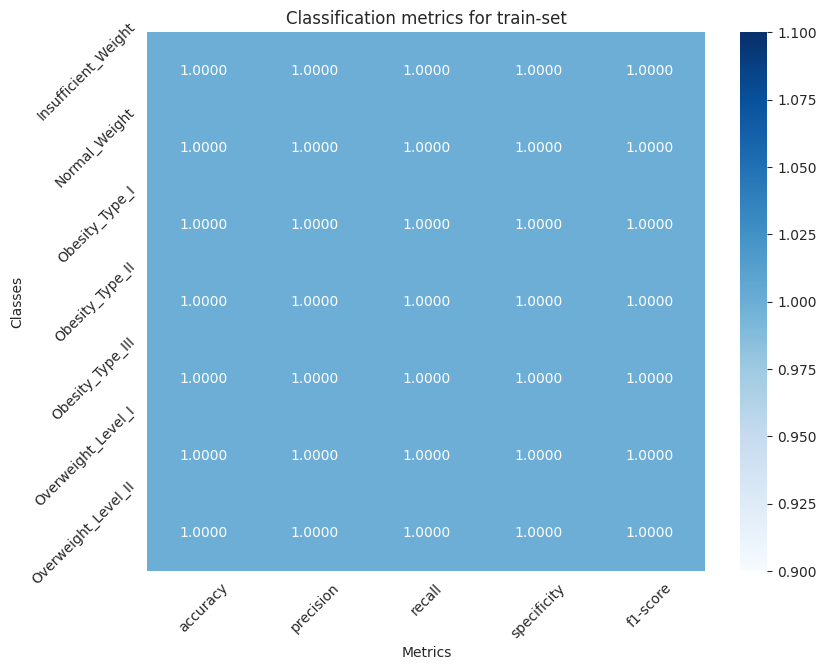

In [58]:
metrics_train_xg = eval_knn.calculate_metrics_by_class(cmxg_train, classes)
eval_xg.plot_metrics_by_class(metrics_train_xg, "Classification metrics for train-set")

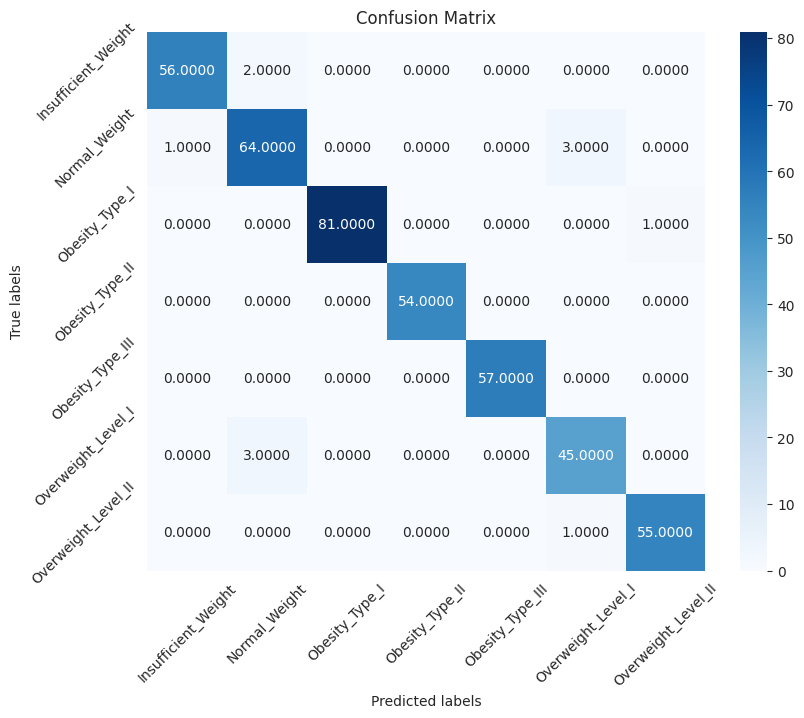

In [59]:
# get confusion matrix in testing
y_pred = rec_xg.predict(x_test)
cmxg_test = eval_xg.get_confusion_matrix(le.fit_transform(y_test), y_pred, le.fit_transform(classes))
eval_xg.plot_confusion_matrix(cmxg_test, classes)

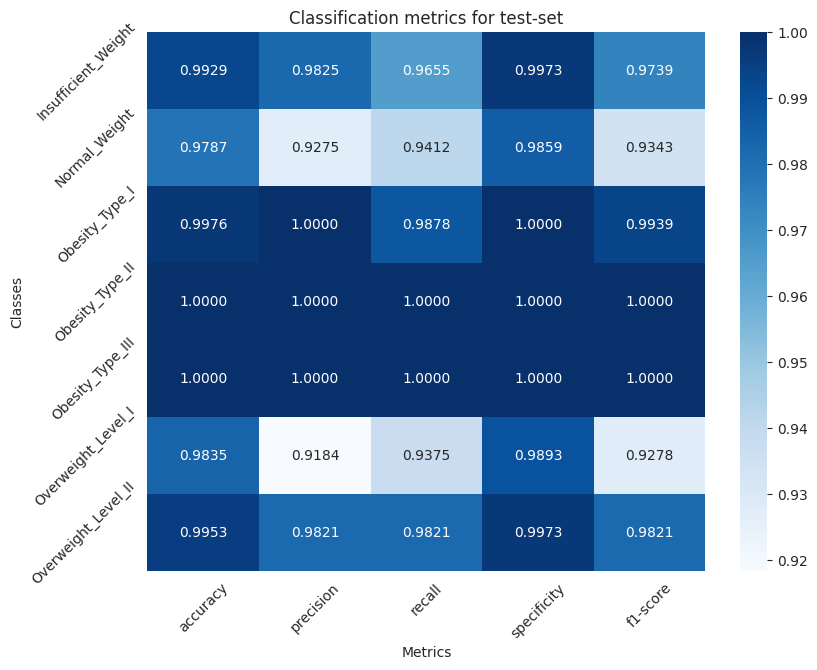

In [60]:
metrics_test_xg = eval_xg.calculate_metrics_by_class(cmxg_test, classes)
eval_xg.plot_metrics_by_class(metrics_test_xg, "Classification metrics for test-set")

In [ ]:
# calculate the metrics for whole test set
xall_xg = eval_xg.calculate_metrics_xall(cmxg_test, metrics_test_xg)
eval_xg.calculate_metrics_xall(cmxg_test, metrics_test_xg)

/tmp/ipykernel_6282/37075880.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eval_xg.calculate_metrics_xall(cmxg_test, metrics_test_xg).iloc[0][0]


np.float64(0.9739952718676123)

##### LightGBM Classifier

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_l = le.fit_transform(y_train)

In [63]:
from scripts.classifiers import LightGBMModel
import time

# train model
sttrain_lgb = time.time()
lgb = LightGBMModel()
lgb_model = lgb.train(x_train, y_train_l)

# calculate time
ettrain_lgb = time.time()
ttrain_lgb = ettrain_lgb - sttrain_lgb
print(f"Time of training XGBoost: {ttrain_lgb:.3f} seconds")

KeyboardInterrupt: 

Time learning is very long

Monitoring using Benchmarks

In [77]:
# xall_knn
# xall_svm
# xall_rf
# accuracy	precision	recall	specificity	f1-score

dict_res = {
    "knn": pd.DataFrame({
        "test": {"accuracy": xall_knn.iloc[0, 0], "precision": xall_knn.iloc[0,1], "recall": xall_knn.iloc[0,2], "specificity": xall_knn.iloc[0,3], "f1-score": xall_knn.iloc[0, 4]},
    }),
    "svm": pd.DataFrame({
        "test": {"accuracy": xall_svm.iloc[0,0], "precision": xall_svm.iloc[0,1], "recall": xall_svm.iloc[0,2], "specificity": xall_svm.iloc[0, 3], "f1-score": xall_svm.iloc[0,4]}
    }),
    "rf": pd.DataFrame({
        "test": {"accuracy": xall_rf.iloc[0,0], "precision": xall_rf.iloc[0,1], "recall": xall_rf.iloc[0,2], "specificity": xall_rf.iloc[0,3], "f1-score": xall_rf.iloc[0,4]}
    }),
}

In [78]:
for key, res in dict_res.items():
    print(f"\nModel: {key}")
    print(res)


Model: knn
                 test
accuracy     0.881797
precision    0.877823
recall       0.881144
specificity  0.980249
f1-score     0.877100

Model: svm
                 test
accuracy     0.976359
precision    0.974325
recall       0.976696
specificity  0.996112
f1-score     0.975415

Model: rf
                 test
accuracy     0.926714
precision    0.930461
recall       0.922726
specificity  0.987673
f1-score     0.925729


In [116]:
import seaborn as sns

def plot_reg_results(res):
    # Create a figure with two subplots
    fig, ax = plt.subplots(2, 3, figsize=(12, 6))

    # Iterate over the dictionary and plot the results for each model
    sns.set_theme(style="whitegrid")
    for i, (key, res) in enumerate(dict_res.items()):
        # Plot the accuracy values
        sns.barplot(x=[f"{key} Test"], y=[res["test"]["accuracy"]], ax=ax[0,0])
        # Plot the precision values
        sns.barplot(x=[f"{key} Test"], y=[res["test"]["precision"]], ax=ax[0,1])
        # Plot the recall values
        sns.barplot(x=[f"{key} Test"], y=[res["test"]["recall"]], ax=ax[0,2])
        # Plot the specificity values
        sns.barplot(x=[f"{key} Test"], y=[res["test"]["specificity"]], ax=ax[1,0])
        # Plot the f1-score values
        sns.barplot(x=[f"{key} Test"], y=[res["test"]["f1-score"]], ax=ax[1,1])

    # Set the titles and labels for the subplots
    ax[0,0].set_title("accuracy")
    ax[0,0].set_xlabel("Model")
    ax[0,0].set_ylabel("accuracy")

    ax[0,1].set_title("precision")
    ax[0,1].set_xlabel("Model")
    ax[0,1].set_ylabel("precision")

    ax[0,2].set_title("recall")
    ax[0,2].set_xlabel("Model")
    ax[0,2].set_ylabel("recall")

    ax[1,0].set_title("specificity")
    ax[1,0].set_xlabel("Model")
    ax[1,0].set_ylabel("specificity")

    ax[1,1].set_title("f1-score")
    ax[1,1].set_xlabel("Model")
    ax[1,1].set_ylabel("f1-score")

    # Show the plot
    plt.show()

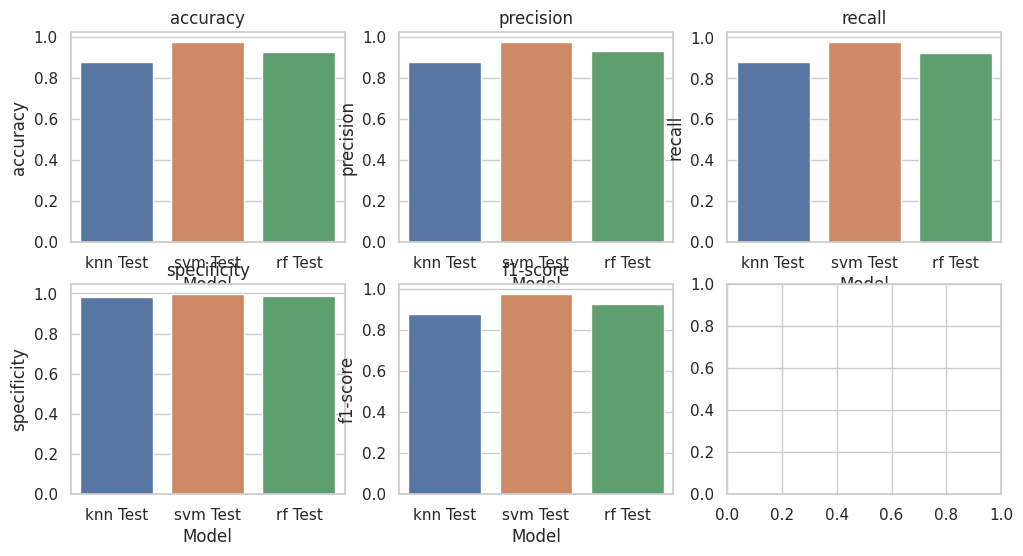

In [118]:
plot_reg_results(dict_res)